# Lecture 10: Interpolation, integration, and statistics

In [1]:
#Imports that we'll need
import matplotlib.pyplot as plt
import numpy as np

<a id=interpolation></a>
# Interpolation

### Linear interpolation

Interpolation between data points can be performed with `interp1d`. This returns the interpolated function. This is an old implementation that isn't used much anymore, but you might see it in older code.

In [3]:
from scipy.interpolate import interp1d

x = (1, 2)
y = (5, 7)
print('Points:', list(zip(x, y)))

f = interp1d(x, y, kind='linear') # Specify linear interpolation, other options are cubic or quadratic
x_interp = [1.25, 1.5, 1.75] # Specify x-coordinate where you want an interpolated point
print('Interpolation:', list(zip(x_interp, f(x_interp))))

Points: [(1, 5), (2, 7)]
Interpolation: [(1.25, 5.5), (1.5, 6.0), (1.75, 6.5)]


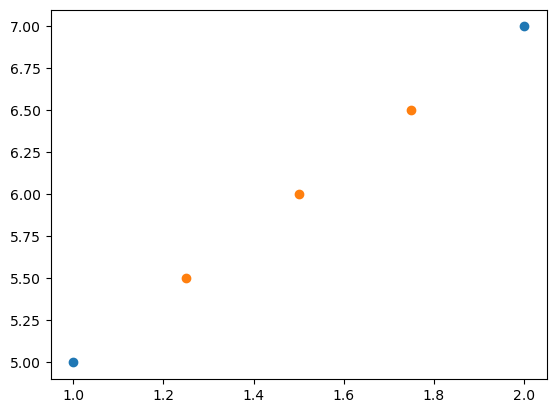

In [5]:
plt.scatter(x,y)
plt.scatter(x_interp,f(x_interp))
None

If you are writing your own code, the recommended routine is `np.interp`. It has some drawbacks, though, it only supports linear interpolation and doesn't allow you to control how you extrapolate beyond the data boundaries.

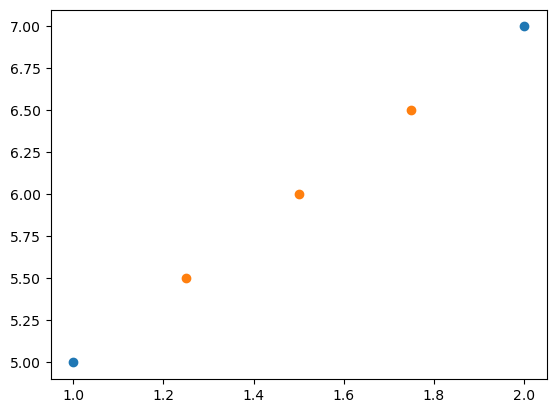

In [7]:
numpy_x_interp = np.interp(x_interp, x, y)
plt.scatter(x,y)
plt.scatter(x_interp,numpy_x_interp)
None

We might prefer to plot the interpolated function as a line. 

In [8]:
xnew = np.linspace(1.0, 2.0, num=1001)
ynew = np.interp(xnew, x, y) # Give interp the x-coords where you want an interpolated value, and the x and y coordinates of data
ynew

array([5.   , 5.002, 5.004, ..., 6.996, 6.998, 7.   ])

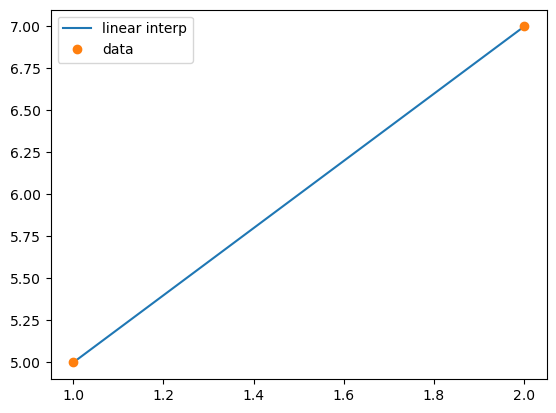

In [10]:
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
None

Let's try extrapolating beyond the range where we have data.

In [11]:
xextrp = np.linspace(0.0, 3.0, num=1001)
yextrp = np.interp(xextrp, x, y)

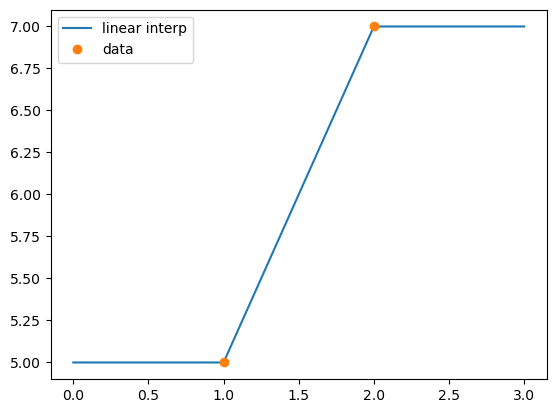

In [12]:
plt.plot(xextrp, yextrp, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')

It works, but this likely isn't the behavior we want. We can use `make_interp_spline` from scipy if we care about the extrapolation.

In [16]:
from scipy.interpolate import make_interp_spline
x1 = np.linspace(0, 5, 11)
y1 = 2*x1
spl = make_interp_spline(x1, y1, k=1)  # k=1: linear

x2 = np.linspace(-1, 6, 1001) # x-values where we want the interpolated y-values

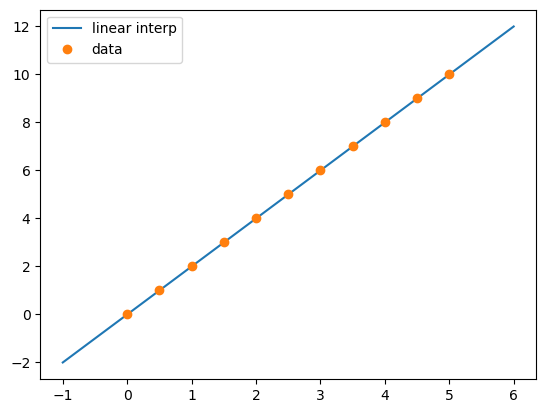

In [15]:
plt.plot(x2, spl(x2), '-', label='linear interp')
plt.plot(x1, y1, 'o', label='data')
plt.legend(loc='best')
None

Let's look at a more interesting function.

In [17]:
x = np.linspace(0, 10, 11)
y = np.cos(-x**2 / 9.0)

xnew = np.linspace(0, 10, 1001)
ynew = np.interp(xnew, x, y) 

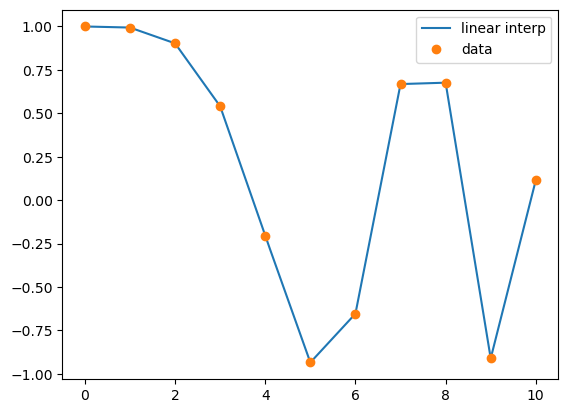

In [19]:
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
None

We might guess here that the linear interpolation, while it describes the data well, does not describe the underlying function well.

### Cubic spline interpolation

Cubic splines give a smooth interpolation between points by constructing a function from piece-wise functions with matching first and second derivatives.

Cubic spline interpolation has its own method, `CubicSpline`.

In [20]:
from scipy.interpolate import CubicSpline

x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.)
spl = CubicSpline(x, y)

xnew = np.linspace(0, 10, 1001)
ynew = spl(xnew) # Pass in x-coordinates where we want an interpolated value

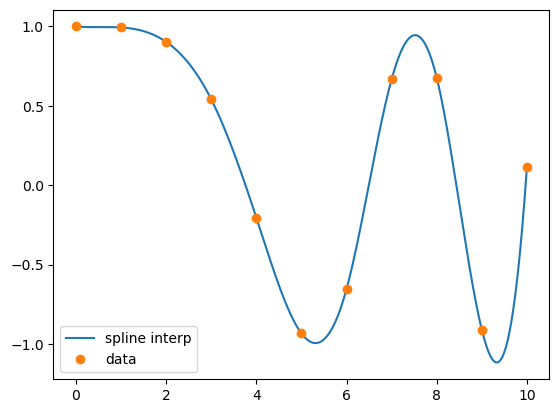

In [22]:
plt.plot(xnew, ynew, '-', label='spline interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
None

# Differentiation

Differentiation is also possible with numpy and scipy. numpy and scipy take different approaches. scipy will compute the derivative of a function, while numpy will calculate a derivative based on an array of values. If we know the function we want to differentiate, scipy is preferable.

In [23]:
from scipy.differentiate import derivative

def f(x):
    return np.cos(-x**2 / 9.)

x = np.linspace(0, 10, 1001)

In [24]:
der = derivative(f, x) 
der

     success: [False False ...  True  True]
      status: [-1 -1 ...  0  0]
          df: [ 6.677e-15 -2.469e-08 ...  2.210e+00  2.207e+00]
       error: [ 6.161e-15  3.575e-13 ...  1.323e-09  1.455e-09]
         nit: [ 4 10 ...  2  2]
        nfev: [15 27 ... 11 11]
           x: [ 0.000e+00  1.000e-02 ...  9.990e+00  1.000e+01]

You can access the derivative at the x-coordinates and the uncertainty on the derivative at the x-coordinates.

In [25]:
der.df

array([ 6.67684603e-15, -2.46909044e-08, -1.97530867e-07, ...,
        2.21216867e+00,  2.21033926e+00,  2.20740676e+00])

In [26]:
der.error

array([6.16054335e-15, 3.57542097e-13, 1.62723327e-15, ...,
       1.19230492e-09, 1.32325706e-09, 1.45548018e-09])

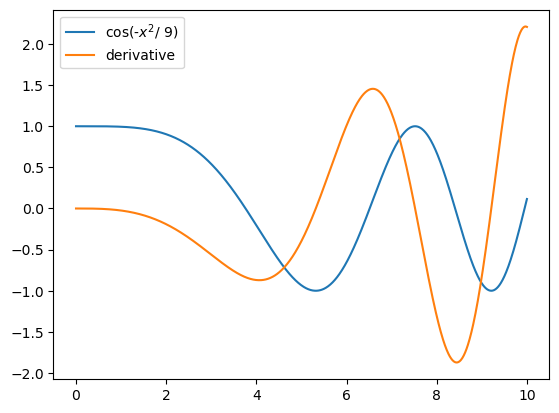

In [28]:
plt.plot(x, f(x), label='cos(-$x^{2}$/ 9)')
plt.plot(x, der.df, label='derivative')
plt.legend(loc='best')
None

# Numerical integration

We will discuss function integration and sample integration in scipy.

## Function integration

We can use `quad` to evaluate 1D numerical integrals. Let's look at integrating a quadratic polynomial $f(x) = 3x^2 + 6x - 9$ over an interval $x \in [0, 5]$. Analytically, the answer is:

$$ \int_0^5 3x^2 + 6x - 9 \ dx = \left[ x^3 + 3x^2 - 9x \right]_{x = 0}^{x = 5} = 155 $$

In [29]:
from scipy.integrate import quad

def f(x):
    return 3*x**2 + 6*x - 9

integral, integral_error = quad(f, 0, 5) # Pass in the function and the bounds
integral, integral_error

(155.00000000000003, 1.832332444897697e-12)

The first parameter `quad` returns is the answer; the second is an estimate of the absolute error in the result.

For higher dimensional integrals, we can use `dblquad`, `tplquad`, or `nquad`.

For instance, let's integrate

$$ \int_0^5 \int_{-x}^{x^{2}} \sin(x + y{^2} ) dy dx $$

In [30]:
from scipy.integrate import dblquad

f = lambda x, y: np.sin(x+y**2)
lby = lambda x: -x
uby = lambda x: x**2
integral, integral_error = dblquad(f, 0, 5, lby, uby)
integral, integral_error

(0.9245429411143953, 1.4778613075591604e-08)

Note how useful lambda functions are in this case!

It is worth noting that for more complicated functions (e.g. with singularities), you might want to consider a different integration method, like `quadrature` or `romberg`.

## Sample integration

If you want to integrate a sample of data points, rather than a function, scipy has functions for sample integration, including `trapezoid` and `simpson`.

In [31]:
from scipy.integrate import trapezoid

# 20 grid points
x1 = np.linspace(-10, 10, 20)
y1 = np.cos(-x1**2 / 9.)
print('  20 points:', trapezoid(y1, x1))   # note the order of the arguments: y, x

# 1000 grid points
x2 = np.linspace(-10, 10, 1000)
y2 = np.cos(-x2**2 / 9.)
print('1000 points:', trapezoid(y2, x2))

  20 points: 3.3174752960466076
1000 points: 2.8666523713462704


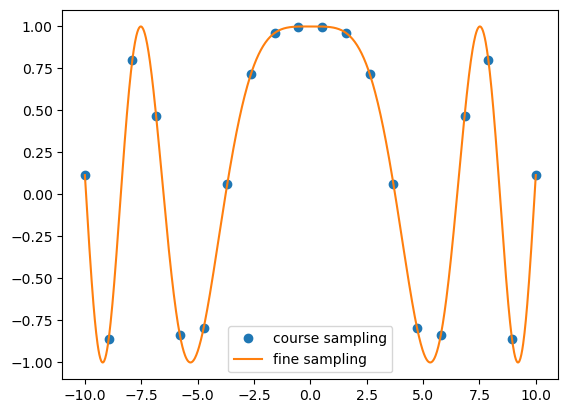

In [32]:
plt.plot(x1, y1, 'o', label='course sampling')
plt.plot(x2, y2, '-', label='fine sampling')
plt.legend(loc='best')

# Statistics

### Continuous distributions

The `scipy.stats` package contains many important statistical distributions often fundamental to analyze data.

Let's start by looking at the most general function, a normal distribution.

In [33]:
from scipy.stats import norm

To plot it, we just have to use the `pdf()` method.

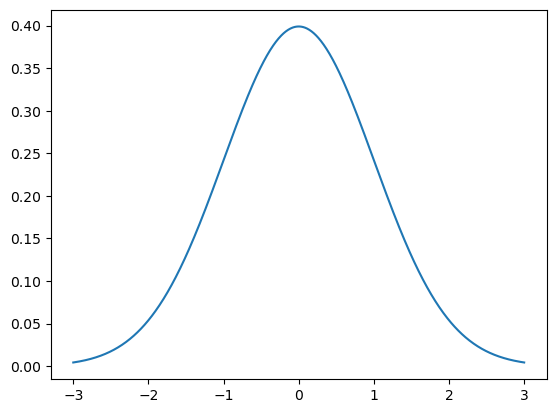

In [34]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x))

We can also very simply look at mean, standard deviation, and variance.

Mean: 0.0, standard deviation: 1.0, variance: 1.0


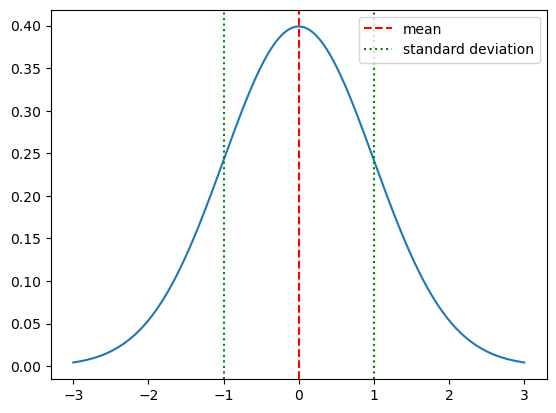

In [35]:
plt.plot(x, norm.pdf(x))

m = norm.mean()
std = norm.std()
var = norm.var()

plt.axvline(m, linestyle = '--', color = 'red', label = 'mean')
plt.axvline(m+std, color = 'green', linestyle = 'dotted', label = 'standard deviation')
plt.axvline(m-std, color = 'green', linestyle = 'dotted')

print(f"Mean: {m}, standard deviation: {std}, variance: {var}")

plt.legend()

A very useful tool is as well the *cumulative density function*, which we can use via the method `cdf()`.

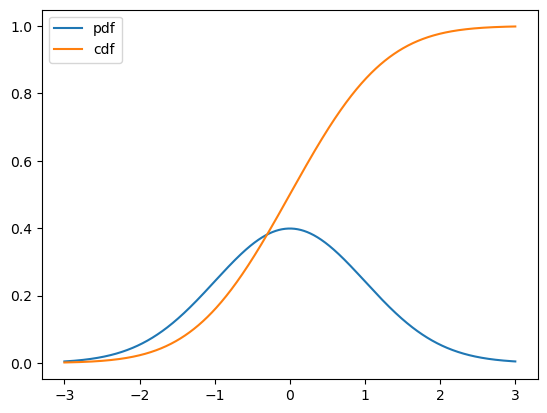

In [36]:
plt.plot(x, norm.pdf(x), label = 'pdf')
plt.plot(x, norm.cdf(x), label = 'cdf')
plt.legend()

We can also look at the ppf, the *percent point function*.

1.644853626951472


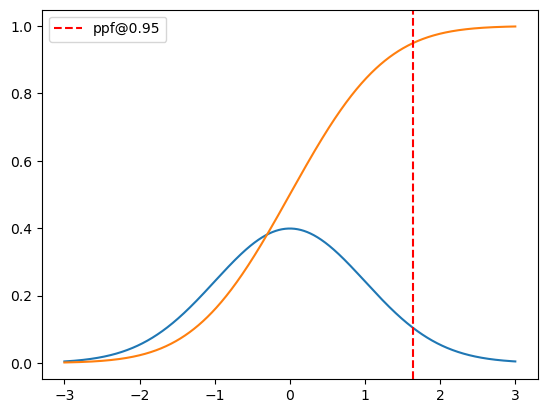

In [37]:
print(norm.ppf(0.95)) 

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))
plt.axvline(norm.ppf(0.95), linestyle = '--', color = 'red', label = 'ppf@0.95')
plt.legend()

Let's see the exponential distribution.

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

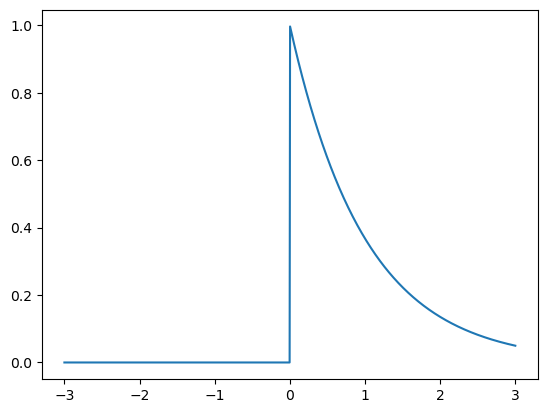

In [38]:
from scipy.stats import expon
plt.plot(x, expon.pdf(x))

The ppf can also be useful to find the median.

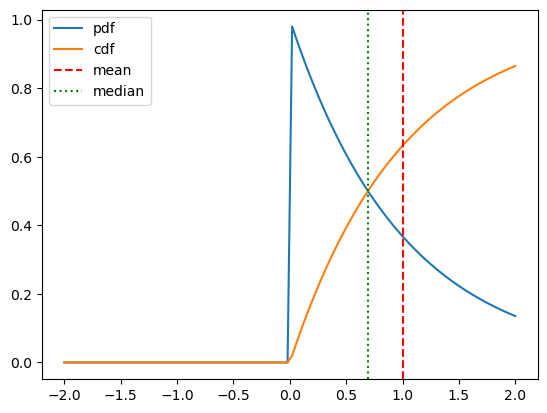

In [39]:
x = np.linspace(-2,2,100)
plt.plot(x, expon.pdf(x), label = 'pdf')
plt.plot(x, expon.cdf(x), label = 'cdf')
plt.axvline(expon.mean(), color = 'red', linestyle = '--', label = 'mean')
plt.axvline(expon.ppf(0.5), color = 'green', linestyle = 'dotted', label = 'median')
plt.legend()

With the argument `loc` we can change the location of the distribution (or its mean)

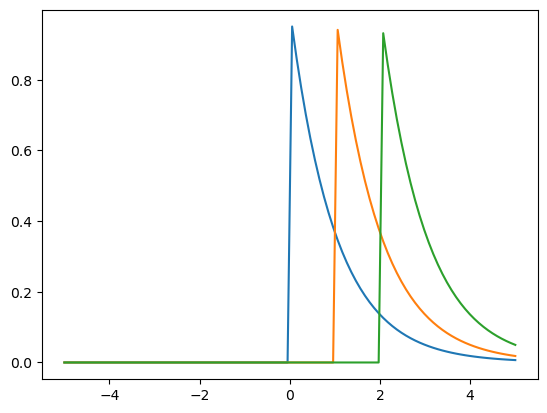

In [40]:
x = np.linspace(-5,5, 100)
plt.plot(x, expon.pdf(x))
plt.plot(x, expon.pdf(x, loc=1))
plt.plot(x, expon.pdf(x, loc=2))

With the argument `scale` we change the scale of the $x$ variable through the transformation `(x - loc) / scale`. As an example, changing the argument `scale` for the exponential distribution is equivalent to change $1/\lambda$.

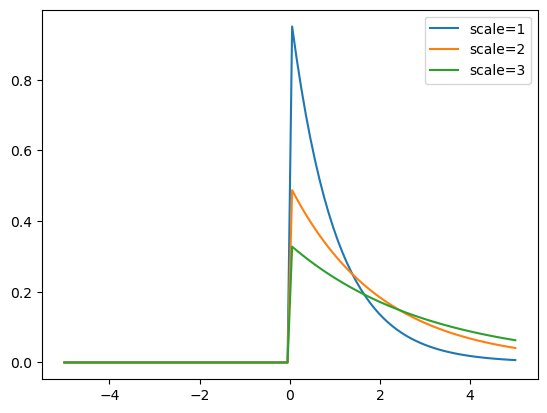

In [41]:
x = np.linspace(-5, 5, 100)
plt.plot(x, expon.pdf(x), label='scale=1')
plt.plot(x, expon.pdf(x, scale=2), label='scale=2')
plt.plot(x, expon.pdf(x, scale=3), label='scale=3')
plt.legend()

### Discrete distributions

Discrete distributions must be handled differently from continuous distribusions. 
[Here](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) you can find all the discrete distributions in `scipy.stats`. We will see here the Poisson distribution:

$$
p(k|\mu) = \frac{\mu^k}{k!}e^{-\mu}
$$

Here, $k$ is the number of measured counts, $\mu$ is a parameter, the expected value of $k$.


To understand it better, let's take an example. The [DarkSide-20k experiment](https://www.lngs.infn.it/en/darkside) aims to detect directly dark matter. It is situated below the Gran Sasso mountain (2912 m) in central Italy, covered by about 1400 m of rock. This special location permits the DarkSide-20k experiment to operate with a very low background. For the aims of this example, we will assume there is no background and the only signals that it would detect are from WIMPs (*Weakly Interacting Massive Particles*, one of the particles proposed to explain dark matter). The experiment takes data for 10 years. If the expected rate from WIMPs is of 1 every 5 years, what is the probability to detect 4 signal events?

**Solution**

The rate is $\lambda = 0.2$ y$^{-1}$. The total period of operation of the experiment is $T=10$ y. So the expectation value for the number of detections is $\mu = \lambda T = 2$. The number of detections $k$ will be distributed with a Poisson distribution, all we have to do is substitute $k$ and $\mu$ with our numbers in the probability mass function (`pmf`).

In [43]:
from scipy.stats import poisson

mu = 2
probability = poisson.pmf(4, mu)
print(f"The probability of detecting 4 signal events is: {probability*100:.2}%")

The probability of detecting 4 signal events is: 9.0%


Let's see more about the Poisson distribution.

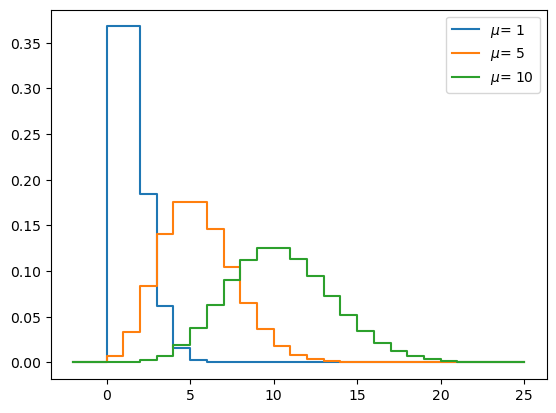

In [44]:
x = np.linspace(-2,25, dtype=int)

mu = 1
plt.step(x, poisson.pmf(x, mu), where = 'post', label = r"$\mu$" f"= {mu}") 

mu = 5
plt.step(x, poisson.pmf(x, mu), where = 'post', label = r"$\mu$" f"= {mu}")

mu = 10
plt.step(x, poisson.pmf(x, mu), where = 'post', label = r"$\mu$" f"= {mu}")

plt.legend()

In [45]:
# To calculate the first four moments:

mu = 0.6
mean, var = poisson.stats(mu, moments='mv')
print(f"The mean is {mu} with standard deviation {np.sqrt(var):.2f}")

The mean is 0.6 with standard deviation 0.77


As we've seen elsewhere in the course, it is possible to draw random numbers according to a statistical distribution. It is even possible in SciPy to draw random numbers from a distribution that you define - this can be convenient!

# Special Functions

SciPy has a long list of special functions, documented here: https://docs.scipy.org/doc/scipy-1.17.0/reference/special.html.

For example, we can look at Bessel functions, which describe waves propagating in a cylindrical guide, as well as solutions to the radial Schrödinger equation for a free particle.

They are solutions to Bessel's equation

$$
x^2 \frac{d^{2}y}{dx^{2}} + x \frac{dy}{dx} + (x^{2} - \alpha^{2})y = 0
$$

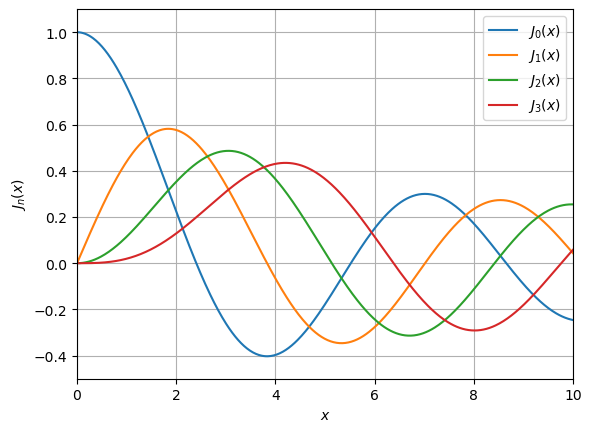

In [46]:
import scipy.special as sp

x=np.linspace(0,10,500) 

for v in range(0,4): 
    plt.plot(x,sp.jv(v,x)) 
plt.xlim((0,10)) 
plt.ylim((-0.5,1.1)) 
plt.legend(('${J}_0(x)$','${J}_1(x)$','${J}_2(x)$', '${J}_3(x)$'), loc=0) 
plt.xlabel('$x$') 
plt.ylabel('${J}_n(x)$') 
plt.grid(True)